# Data Cleaning

This is just performed on a fraction of the data, because I am due to receive the whole file further down the line. However, the patterns and formating issues, as this is a list of restaurants and their addresses and details, is unlikely to change. Hence, once I have regex'd and cleaned this data, I can just run it over whole file.

The idea of this exercise is, that I will build a dashboard for the charity, for free, so that they can visualise the data on a geo map, done on plotly.

In [73]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

## Import CSV

In [2]:
# Read csv while removing header as no header in original file
df = pd.read_csv('zuerich_csv.csv',header=None)
df.head(3)

,0,1,2,3,4,5,6
0,Unsere Gastronomiemitglieder haben mit uns ein...,NaN,NaN,NaN,NaN,NaN,NaN
1,8001,Restaurant Au Gratin,Bahnhofplatz 2\n8001 Zürich,www.augratin.ch,044 221 38 00 \ninfo@newszh.ch,Unsere glutenfreien Gerichte sind auf der Spei...,NaN
2,8001,Haus Hiltl,Sihlstrasse 28\n8001 Zürich,www.hiltl.ch,044 227 70 00\ninfo@hiltl.ch,"Hiltl, das bekannteste vegetarische Restaurant...",NaN


## EDA

In [3]:
df.head(1)

,0,1,2,3,4,5,6
0,Unsere Gastronomiemitglieder haben mit uns ein...,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Drop first row as description and NaN only
df = df.drop(0)
df.head()

,0,1,2,3,4,5,6
1,8001,Restaurant Au Gratin,Bahnhofplatz 2\n8001 Zürich,www.augratin.ch,044 221 38 00 \ninfo@newszh.ch,Unsere glutenfreien Gerichte sind auf der Spei...,NaN
2,8001,Haus Hiltl,Sihlstrasse 28\n8001 Zürich,www.hiltl.ch,044 227 70 00\ninfo@hiltl.ch,"Hiltl, das bekannteste vegetarische Restaurant...",NaN
3,8001,Kunsthausrestaurant\n(Remimag AG),Heimplatz 1\n8001 Zürich,www.kunsthausrestaurant.ch,044 251 53 53\nkunsthausrestaurant@\nremimag.ch,Genauso kunterbunt wie die Kunst im nahegelege...,NaN
4,8001,Hitzberger Fastfood natürlich\nHauptbahnhof Zü...,Take Away Passage Bahnhofstrasse Zürich Shop-V...,www.hitzberger.ch,044 212 37 20 \n\n,Das Schnellverpflegungskonzept Hitzberger – Fa...,NaN
5,8005,SamSeS Vegetarisches Restaurant,Langstrasse 231\n8005 Zürich,www.samses.ch,044 440 13 13,"Bei uns geniessen Sie gefüllte Ravioli, Gnocch...",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1 to 15
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       15 non-null     object 
 1   1       15 non-null     object 
 2   2       15 non-null     object 
 3   3       15 non-null     object 
 4   4       15 non-null     object 
 5   5       15 non-null     object 
 6   6       0 non-null      float64
dtypes: float64(1), object(6)
memory usage: 960.0+ bytes


' Please remove ## if you want to save visualisation to your computer'

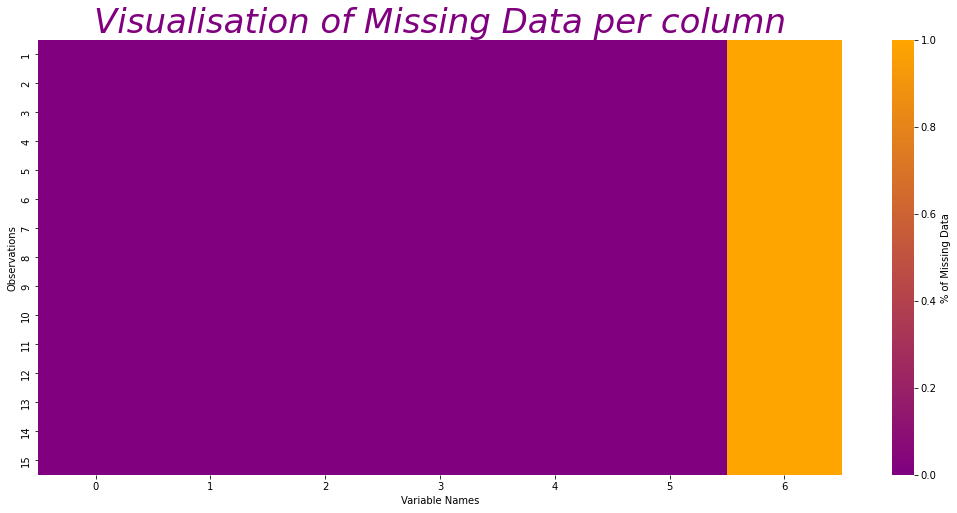

In [6]:
plt.figure(figsize=(18,8))

# Labelling chart
plt.title('Visualisation of Missing Data per column', fontsize = 34.0, color='Purple', fontstyle='italic')

#Plotting and labelling colour bar
sns.heatmap(df.isnull(),cmap=sns.color_palette("blend:purple,orange", as_cmap=True), 
            cbar_kws={'label': '% of Missing Data'},annot_kws={'size':16});

plt.xlabel('Variable Names')
plt.ylabel('Observations')

' Please remove ## if you want to save visualisation to your computer'
# Saving as image and pdf
##plt.savefig('Vis_Missing_Data_per_column.png',dpi=100)
##plt.savefig('Visualisation of Missing Data per column.pdf')

In [7]:
# Drop column 6 as it is empty
df.drop([6], axis=1,inplace=True)
df.head()

,0,1,2,3,4,5
1,8001,Restaurant Au Gratin,Bahnhofplatz 2\n8001 Zürich,www.augratin.ch,044 221 38 00 \ninfo@newszh.ch,Unsere glutenfreien Gerichte sind auf der Spei...
2,8001,Haus Hiltl,Sihlstrasse 28\n8001 Zürich,www.hiltl.ch,044 227 70 00\ninfo@hiltl.ch,"Hiltl, das bekannteste vegetarische Restaurant..."
3,8001,Kunsthausrestaurant\n(Remimag AG),Heimplatz 1\n8001 Zürich,www.kunsthausrestaurant.ch,044 251 53 53\nkunsthausrestaurant@\nremimag.ch,Genauso kunterbunt wie die Kunst im nahegelege...
4,8001,Hitzberger Fastfood natürlich\nHauptbahnhof Zü...,Take Away Passage Bahnhofstrasse Zürich Shop-V...,www.hitzberger.ch,044 212 37 20 \n\n,Das Schnellverpflegungskonzept Hitzberger – Fa...
5,8005,SamSeS Vegetarisches Restaurant,Langstrasse 231\n8005 Zürich,www.samses.ch,044 440 13 13,"Bei uns geniessen Sie gefüllte Ravioli, Gnocch..."


In [8]:
# Rename all columns
df.rename(columns = {0:'plz',1:'restaurant',2:'adresse',
                    3:'web',4:'kontakt',5:'beschreibung'},
          inplace=True)

#df.head()


In [9]:
# Verify number of empty cells
df.count()

plz             15
restaurant      15
adresse         15
web             15
kontakt         15
beschreibung    15
dtype: int64

In [10]:
# Creating a copy of my df to clean up columns with Regex
mdf = df.copy()

In [11]:
df.head()

,plz,restaurant,adresse,web,kontakt,beschreibung
1,8001,Restaurant Au Gratin,Bahnhofplatz 2\n8001 Zürich,www.augratin.ch,044 221 38 00 \ninfo@newszh.ch,Unsere glutenfreien Gerichte sind auf der Spei...
2,8001,Haus Hiltl,Sihlstrasse 28\n8001 Zürich,www.hiltl.ch,044 227 70 00\ninfo@hiltl.ch,"Hiltl, das bekannteste vegetarische Restaurant..."
3,8001,Kunsthausrestaurant\n(Remimag AG),Heimplatz 1\n8001 Zürich,www.kunsthausrestaurant.ch,044 251 53 53\nkunsthausrestaurant@\nremimag.ch,Genauso kunterbunt wie die Kunst im nahegelege...
4,8001,Hitzberger Fastfood natürlich\nHauptbahnhof Zü...,Take Away Passage Bahnhofstrasse Zürich Shop-V...,www.hitzberger.ch,044 212 37 20 \n\n,Das Schnellverpflegungskonzept Hitzberger – Fa...
5,8005,SamSeS Vegetarisches Restaurant,Langstrasse 231\n8005 Zürich,www.samses.ch,044 440 13 13,"Bei uns geniessen Sie gefüllte Ravioli, Gnocch..."


In [12]:
# Set option to display all characters within a column
pd.set_option('display.max_colwidth', None)

In [13]:
# Verify it worked
mdf[['adresse']].iloc[[3]]

,adresse
4,Take Away Passage Bahnhofstrasse Zürich Shop-Ville Zürich Hauptbahnhof


In [14]:
df.head(1)

,plz,restaurant,adresse,web,kontakt,beschreibung
1,8001,Restaurant Au Gratin,Bahnhofplatz 2\n8001 Zürich,www.augratin.ch,044 221 38 00 \ninfo@newszh.ch,"Unsere glutenfreien Gerichte sind auf der Speisekarte\ngekennzeichnet. Sie brauchen keine Spezialkarte zu\nverlangen. Auf unserer Homepage www.augratin.ch können\nSie die Gerichte anschauen. Dabei sehen Sie, dass wir eine\ngrosse Auswahl an glutenfreien Gerichten anbieten."


In [15]:
df.columns

Index(['plz', 'restaurant', 'adresse', 'web', 'kontakt', 'beschreibung'], dtype='object')

In [16]:
# Replace all new line breaks (\n) with a space
df = mdf.replace(r'\n',' ', regex=True)

In [17]:
df.head(1)

,plz,restaurant,adresse,web,kontakt,beschreibung
1,8001,Restaurant Au Gratin,Bahnhofplatz 2 8001 Zürich,www.augratin.ch,044 221 38 00 info@newszh.ch,"Unsere glutenfreien Gerichte sind auf der Speisekarte gekennzeichnet. Sie brauchen keine Spezialkarte zu verlangen. Auf unserer Homepage www.augratin.ch können Sie die Gerichte anschauen. Dabei sehen Sie, dass wir eine grosse Auswahl an glutenfreien Gerichten anbieten."


In [18]:
# Replace all Zürich with a space
df['adresse'] = df['adresse'].replace(r'Zürich',' ', regex=True)

In [19]:
df.head(1)

,plz,restaurant,adresse,web,kontakt,beschreibung
1,8001,Restaurant Au Gratin,Bahnhofplatz 2 8001,www.augratin.ch,044 221 38 00 info@newszh.ch,"Unsere glutenfreien Gerichte sind auf der Speisekarte gekennzeichnet. Sie brauchen keine Spezialkarte zu verlangen. Auf unserer Homepage www.augratin.ch können Sie die Gerichte anschauen. Dabei sehen Sie, dass wir eine grosse Auswahl an glutenfreien Gerichten anbieten."


In [20]:
# Replace 4 digits (postcode) in the address with a blank
df['adresse'] = df.adresse.replace({'\d{4}':''}, regex=True)

In [21]:
# Check data for a sample of 1/3 of the data
df.sample(frac=.33)

,plz,restaurant,adresse,web,kontakt,beschreibung
5,8005,SamSeS Vegetarisches Restaurant,Langstrasse 231,www.samses.ch,044 440 13 13,"Bei uns geniessen Sie gefüllte Ravioli, Gnocchi, Brot, verschiedene Gerichte am Buffet, Salate, Vorspeisen, Hauptgerichte. Als Dessert bieten wir Schokoladen Kuchen, Eis, Panna Cotta, Mousse, Cheescake."
11,8032,Design Hotel Plattenhof & Restaurant Sento,bergstrasse 19,www.sento.ch,044 251 19 10 restaurant@sento.ch,"Das Angebot umfasst verschiedene glutenfreie Fisch- und Fleischgerichte, Salate (z.B. Pouletsalat), glutenfreie Teigwaren und glutenfreies Brot. Das Personal ist bestens informiert. Bitte die Details jeweils bei der Bestellung besprechen."
7,8005,Restaurant Don Weber,Heinrichstrasse 213,www.donweber.ch,044 272 05 40 info@donweber.ch,"Wir haben eine gut gekennzeichnete spezielle gluten- & laktosefreie Speisekarte, die Sie gerne bei unseren Don’s & Doñas verlangen können. Unsere mexikanischen Klassiker wie Nachos, Fajitas & Burritos, sowie unsere verschiedenen Burgers sind der Renner. Nicht zu vergessen unser gluten- & laktosefreies warmes Schoggiküchlein zum Abschluss – der Traum jedes Allergiker’s. Im Angebot ist immer mind. 1 glutenfreies Bier welches optimal zu einem Bistec de Carne, Mexican Pollo oder Surf Ajillo passt."
14,8050,Telepizza Zürich Oerlikon,Dörflistrasse 117,www.telepizza.ch,Zentrale 0844 33 33 33 Tel. direkt: 043 300 60 30,"Wir bieten glutenfreie Pizzen in unseren verschiedenen Filialen an z.B. Pizza Margherita, Salami und Hawai. Dazu reichen wir Ihnen gerne ein glutenfreies Bier. Bei den Desserts haben Sie eine Auswahl aus einzelverpackten Produkten."
6,8005,Hitzberger Fastfood Zürich Puls 5,Giessereistrasse 18,www.hitzberger.ch,044 271 24 00,"Das Schnellverpflegungskonzept Hitzberger – Fastfood natürlich bietet an folgenden Standorten ein Sortiment an glutenfreien Salaten, Curries, Suppen, Smoothies und Säften sowie Desserts (die glutenfreien Angebote sind entsprechend gekennzeichnet)."


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1 to 15
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   plz           15 non-null     object
 1   restaurant    15 non-null     object
 2   adresse       15 non-null     object
 3   web           15 non-null     object
 4   kontakt       15 non-null     object
 5   beschreibung  15 non-null     object
dtypes: object(6)
memory usage: 840.0+ bytes


### Tidy up 'adresse' column to contain only street and number

In [23]:
# Find address columns not containing 'strasse'
df_ns = df[~df['adresse'].str.contains('strasse')]
df_ns

,plz,restaurant,adresse,web,kontakt,beschreibung
1,8001,Restaurant Au Gratin,Bahnhofplatz 2,www.augratin.ch,044 221 38 00 info@newszh.ch,"Unsere glutenfreien Gerichte sind auf der Speisekarte gekennzeichnet. Sie brauchen keine Spezialkarte zu verlangen. Auf unserer Homepage www.augratin.ch können Sie die Gerichte anschauen. Dabei sehen Sie, dass wir eine grosse Auswahl an glutenfreien Gerichten anbieten."
3,8001,Kunsthausrestaurant (Remimag AG),Heimplatz 1,www.kunsthausrestaurant.ch,044 251 53 53 kunsthausrestaurant@ remimag.ch,"Genauso kunterbunt wie die Kunst im nahegelegenen Kunsthaus, zeigt sich auch die Gästeschar im Restaurant und das Speiseangebot der Küche. Geprägt wird das alles von einer gelungenen Symbiose zwischen traditionellen und mediterranen Einflüssen. Das Speiseangebot umfasst mittags und abends während den Servicezeiten immer glutenfreie Produkte, unabhängig ob Suppe, Vorspeise oder Hauptgang. Die glutenfreie Pasta kann ganztags bestellt werden und ist über den hauseigenen Mercato auch für daheim erhältlich."
8,8005,Menu & More AG,Sihlquai 340,www.menuandmore.ch,044 448 26 11 info@menuandmore.ch,"Wir bieten Horten und Krippen verschiedene glutenfreie Menükomponenten, die als glutenfrei deklariert sind. Zusätzlich bieten wir als Zusatzsortiment 23 laktose- und glutenfreie Produkte als Einzelportionen verpackt, an (Eiweisskomponenten inkl. Vegi, Saucen, Stärkebeilagen). Bestellung der Mahlzeiten bis 4 Arbeitstage vor dem Menüdatum empfehlenswert."
13,8045,Hitzberger Fastfood Zürich Sihlcity,Sihlcity Mall Mitte (Ebene 0),www.hitzberger.ch,044 201 34 00,"Das Schnellverpflegungskonzept Hitzberger – Fastfood natürlich bietet an folgenden Standorten ein Sortiment an glutenfreien Salaten, Curries, Suppen, Smoothies und Säften sowie Desserts (die glutenfreien Angebote sind entsprechend gekennzeichnet)."


In [24]:
# Replace current text in row 13 with the address of the mall
df.loc[13,'adresse'] = 'Kalandarplatz 1'

In [25]:
# Verify change
df.loc[13,'adresse']

'Kalandarplatz 1'

In [26]:
# Using regex to find adresse inputs without street numbers (digits) to avoid missing inputs that need correcting.
df[~df['adresse'].str.contains('\\d', regex=True)]

,plz,restaurant,adresse,web,kontakt,beschreibung
4,8001,Hitzberger Fastfood natürlich Hauptbahnhof Zürich,Take Away Passage Bahnhofstrasse Shop-Ville Hauptbahnhof,www.hitzberger.ch,044 212 37 20,"Das Schnellverpflegungskonzept Hitzberger – Fastfood natürlich bietet an folgenden Standorten ein Sortiment an glutenfreien Salaten, Curries, Suppen, Smoothies und Säften sowie Desserts (die glutenfreien Angebote sind entsprechend gekennzeichnet)."


In [27]:
# Replace current text in row 4 with the address of the mall
df.loc[4,'adresse'] = 'Museumstrasse 1'

In [28]:
df.loc[4, 'adresse']

'Museumstrasse 1'

In [29]:
# Looking at address column to verify formating
df.adresse

1             Bahnhofplatz 2   
2             Sihlstrasse 28   
3                Heimplatz 1   
4               Museumstrasse 1
5            Langstrasse 231   
6        Giessereistrasse 18   
7        Heinrichstrasse 213   
8               Sihlquai 340   
9        Beckenhofstrasse 24   
10    Universitätsstrasse 91   
11            bergstrasse 19   
12      Uetlibergstrasse 341   
13              Kalandarplatz 1
14         Dörflistrasse 117   
15      Hofwiesenstrasse 188   
Name: adresse, dtype: object

In [30]:
# Isolating index 11 to verify formating requirements
df.loc[11,'adresse']

' bergstrasse 19   '

In [31]:
' There are whitespaces at the beginning and at the end of the column, that need removing'
# Remove leading whitespaces
df['adresse'] = df['adresse'].str.lstrip()
df.loc[11,'adresse']

'bergstrasse 19   '

In [32]:
# Remove trailing whitespaces
df['adresse'] = df['adresse'].str.rstrip()

In [33]:
# Verifying if whitespace was removed
df.loc[11,'adresse']

'bergstrasse 19'

In [34]:
# Saving changes to series
df.loc[11, 'adresse'] = df.loc[11, 'adresse'].lstrip()
df.loc[11,'adresse']

'bergstrasse 19'

In [35]:
# Tidying up all street names to start in capital letters
df['adresse'] = df['adresse'].str.capitalize()
df['adresse'].tail()

11          Bergstrasse 19
12    Uetlibergstrasse 341
13         Kalandarplatz 1
14       Dörflistrasse 117
15    Hofwiesenstrasse 188
Name: adresse, dtype: object

In [36]:
# Making a copy of df with clean address column

df_clean_add = df.copy()

### Tidy up kontakt column (email)

In [37]:
df.head()

,plz,restaurant,adresse,web,kontakt,beschreibung
1,8001,Restaurant Au Gratin,Bahnhofplatz 2,www.augratin.ch,044 221 38 00 info@newszh.ch,"Unsere glutenfreien Gerichte sind auf der Speisekarte gekennzeichnet. Sie brauchen keine Spezialkarte zu verlangen. Auf unserer Homepage www.augratin.ch können Sie die Gerichte anschauen. Dabei sehen Sie, dass wir eine grosse Auswahl an glutenfreien Gerichten anbieten."
2,8001,Haus Hiltl,Sihlstrasse 28,www.hiltl.ch,044 227 70 00 info@hiltl.ch,"Hiltl, das bekannteste vegetarische Restaurant der Schweiz: Ob à la carte Gerichte oder Buffet, alle Speisen sind präzise deklariert und auf der Karte entsprechend gekennzeichnet. Glutenfreies Brot ist vorrätig."
3,8001,Kunsthausrestaurant (Remimag AG),Heimplatz 1,www.kunsthausrestaurant.ch,044 251 53 53 kunsthausrestaurant@ remimag.ch,"Genauso kunterbunt wie die Kunst im nahegelegenen Kunsthaus, zeigt sich auch die Gästeschar im Restaurant und das Speiseangebot der Küche. Geprägt wird das alles von einer gelungenen Symbiose zwischen traditionellen und mediterranen Einflüssen. Das Speiseangebot umfasst mittags und abends während den Servicezeiten immer glutenfreie Produkte, unabhängig ob Suppe, Vorspeise oder Hauptgang. Die glutenfreie Pasta kann ganztags bestellt werden und ist über den hauseigenen Mercato auch für daheim erhältlich."
4,8001,Hitzberger Fastfood natürlich Hauptbahnhof Zürich,Museumstrasse 1,www.hitzberger.ch,044 212 37 20,"Das Schnellverpflegungskonzept Hitzberger – Fastfood natürlich bietet an folgenden Standorten ein Sortiment an glutenfreien Salaten, Curries, Suppen, Smoothies und Säften sowie Desserts (die glutenfreien Angebote sind entsprechend gekennzeichnet)."
5,8005,SamSeS Vegetarisches Restaurant,Langstrasse 231,www.samses.ch,044 440 13 13,"Bei uns geniessen Sie gefüllte Ravioli, Gnocchi, Brot, verschiedene Gerichte am Buffet, Salate, Vorspeisen, Hauptgerichte. Als Dessert bieten wir Schokoladen Kuchen, Eis, Panna Cotta, Mousse, Cheescake."


In [38]:
# Using regex find email addresses and create a list
emails_ = re.findall('\S+@\S+',str(df['kontakt']))
#len(emails_)

In [39]:
emails_

['info@newszh.ch',
 'info@hiltl.ch',
 'info@donweber.ch',
 'info@menuandmore.ch',
 'info@miyuko.ch',
 'linde@remimag.ch',
 'restaurant@sento.ch',
 'info@albisguetli.ch']

In [40]:
len(emails_)

8

In [41]:
# Verify if regex pattern found all email address, in case there where whitespaces
col_with_at = df[df['kontakt'].str.contains('@')]

In [42]:
print("The discrepancy between counting observations including an '@' and our regex approach is", len(col_with_at) - len(emails_),".")

The discrepancy between counting observations including an '@' and our regex approach is 1 .


In [43]:
check = any(email in col_with_at for email in emails_)
check

False

In [44]:
emails_

['info@newszh.ch',
 'info@hiltl.ch',
 'info@donweber.ch',
 'info@menuandmore.ch',
 'info@miyuko.ch',
 'linde@remimag.ch',
 'restaurant@sento.ch',
 'info@albisguetli.ch']

In [45]:
# Create list of observations in 'Kontakt' containing '@'
contact_including_at = list(col_with_at['kontakt'])
contact_including_at

['044 221 38 00  info@newszh.ch',
 '044 227 70 00 info@hiltl.ch',
 '044 251 53 53 kunsthausrestaurant@ remimag.ch',
 '044 272 05 40 info@donweber.ch',
 '044 448 26 11 info@menuandmore.ch',
 '044 350 21 43 info@miyuko.ch',
 '044 362 21 09 linde@remimag.ch',
 '044 251 19 10 restaurant@sento.ch',
 '043 333 30 00 info@albisguetli.ch']

In [46]:
# Confirming that we created a list
type(contact_including_at)

list

In [47]:
# Defining function to remove integers in string format from list including contact information with '@'

def remove(list):

    pattern = '[0-9]'

    list = [re.sub(pattern, '', i) for i in list]

    return list

# Store result
cont_removed = remove(contact_including_at)

# Print to test function
print(remove(contact_including_at))


['     info@newszh.ch', '    info@hiltl.ch', '    kunsthausrestaurant@ remimag.ch', '    info@donweber.ch', '    info@menuandmore.ch', '    info@miyuko.ch', '    linde@remimag.ch', '    restaurant@sento.ch', '    info@albisguetli.ch']


In [48]:
# Stored result verify if nothing got lost. Still 9 entries, all good.
len(cont_removed)

9

In [49]:
# Removing leading spaces with list comprehension
no_leading_spaces = [x.lstrip() for x in cont_removed]

no_leading_spaces

['info@newszh.ch',
 'info@hiltl.ch',
 'kunsthausrestaurant@ remimag.ch',
 'info@donweber.ch',
 'info@menuandmore.ch',
 'info@miyuko.ch',
 'linde@remimag.ch',
 'restaurant@sento.ch',
 'info@albisguetli.ch']

In [50]:
# List comprehension to compare the two lists and find the missmatch

miss_m = [x for x in emails_ + no_leading_spaces if x not in emails_ or x not in no_leading_spaces]

print(miss_m)

['kunsthausrestaurant@ remimag.ch']


In [51]:
# Find column including the wrongly formated email address
df[df['kontakt'].str.contains('kunsthausrestaurant@')]

,plz,restaurant,adresse,web,kontakt,beschreibung
3,8001,Kunsthausrestaurant (Remimag AG),Heimplatz 1,www.kunsthausrestaurant.ch,044 251 53 53 kunsthausrestaurant@ remimag.ch,"Genauso kunterbunt wie die Kunst im nahegelegenen Kunsthaus, zeigt sich auch die Gästeschar im Restaurant und das Speiseangebot der Küche. Geprägt wird das alles von einer gelungenen Symbiose zwischen traditionellen und mediterranen Einflüssen. Das Speiseangebot umfasst mittags und abends während den Servicezeiten immer glutenfreie Produkte, unabhängig ob Suppe, Vorspeise oder Hauptgang. Die glutenfreie Pasta kann ganztags bestellt werden und ist über den hauseigenen Mercato auch für daheim erhältlich."


In [52]:
# Change row 3 with iloc to replace incorrectly formated email address
df.loc[df['kontakt'].str.contains('kunsthausrestaurant@ remimag.ch'), 
                                         'kontakt'] = '044 251 53 53 kunsthausrestaurant@remimag.ch'

In [53]:
# Verify that gap was removed from email address
df[df['kontakt'].str.contains('kunsthausrestaurant@')]

,plz,restaurant,adresse,web,kontakt,beschreibung
3,8001,Kunsthausrestaurant (Remimag AG),Heimplatz 1,www.kunsthausrestaurant.ch,044 251 53 53 kunsthausrestaurant@remimag.ch,"Genauso kunterbunt wie die Kunst im nahegelegenen Kunsthaus, zeigt sich auch die Gästeschar im Restaurant und das Speiseangebot der Küche. Geprägt wird das alles von einer gelungenen Symbiose zwischen traditionellen und mediterranen Einflüssen. Das Speiseangebot umfasst mittags und abends während den Servicezeiten immer glutenfreie Produkte, unabhängig ob Suppe, Vorspeise oder Hauptgang. Die glutenfreie Pasta kann ganztags bestellt werden und ist über den hauseigenen Mercato auch für daheim erhältlich."


In [54]:
# Creating a copy of work so far, to protect work while creating additional features
df_test = df.copy()

In [55]:
# Using a function to create a new column (email) 
def find_email(text):
    email = re.findall(r'[\w\.-]+@[\w\.-]+',str(text))
    return ",".join(email)
df_test['email']=df_test['kontakt'].apply(lambda x: find_email(x))

df_test.sample(3)

,plz,restaurant,adresse,web,kontakt,beschreibung,email
12,8045,Schützenhaus Albisgütli (Gamag Management AG),Uetlibergstrasse 341,www.albisguetli.ch,043 333 30 00 info@albisguetli.ch,"Kulinarischen Genuss finden Sie bei uns in unterschiedlichen Räumlichkeiten. Geniessen Sie im gediegenen Ambiente unserer Taverne schweizerische Köstlichkeiten. Die Wirtschaft ist der richtige Rahmen für ein üppiges Essen oder den kleinen Imbiss vor dem Konzert. Das Gartenrestaurant und die neue Lounge laden besonders an lauen Sommerabenden zum Verweilen ein. Unter grossen Bäumen, die Schatten spenden, lässt sich die Aussicht über Zürich besonders angenehm geniessen. In unserem Gartenrestaurant erhalten Sie sämtliche Speisen, die Sie auch in den Räumlichkeiten bekommen. Die Lounge mit ihren bequemen Sesseln eignet sich perfekt zum Genuss von kleinen Häppchen, erlesenen Apéro-Weinen oder Champagner. Das Speiseangebot umfasst mittags und abends während den Servicezeiten immer glutenfreie Produkte, unabhängig ob Suppe, Vorspeise oder Hauptgang.",info@albisguetli.ch
8,8005,Menu & More AG,Sihlquai 340,www.menuandmore.ch,044 448 26 11 info@menuandmore.ch,"Wir bieten Horten und Krippen verschiedene glutenfreie Menükomponenten, die als glutenfrei deklariert sind. Zusätzlich bieten wir als Zusatzsortiment 23 laktose- und glutenfreie Produkte als Einzelportionen verpackt, an (Eiweisskomponenten inkl. Vegi, Saucen, Stärkebeilagen). Bestellung der Mahlzeiten bis 4 Arbeitstage vor dem Menüdatum empfehlenswert.",info@menuandmore.ch
4,8001,Hitzberger Fastfood natürlich Hauptbahnhof Zürich,Museumstrasse 1,www.hitzberger.ch,044 212 37 20,"Das Schnellverpflegungskonzept Hitzberger – Fastfood natürlich bietet an folgenden Standorten ein Sortiment an glutenfreien Salaten, Curries, Suppen, Smoothies und Säften sowie Desserts (die glutenfreien Angebote sind entsprechend gekennzeichnet).",


In [56]:
'''Because .isna() isn't working, we have to come up with a solution that counts empty cells below.'''  
df_test.email.isna().sum()

0

In [57]:
# Count how many empty entries we have for email

empty_email = df_test.email.eq('').sum()
print('We are missing',empty_email,'email entries.')

We are missing 6 email entries.


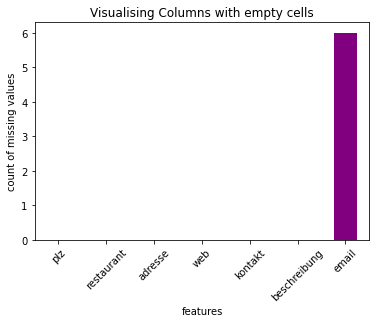

'remove hashes to save figure as pdf'

In [58]:
# Visualising empty entries

df_test.eq('').sum().plot(kind='bar',
                          xlabel = 'features',
                          ylabel = 'count of missing values',
                          title='Visualising Columns with empty cells',
                          rot=45,
                          color='purple')
plt.show()

'remove hashes to save figure as pdf'
##plt.savefig('Visualisation Columns with empty cells.pdf')

In [59]:
# Replace missing entries with NaN

df_test.email.replace('',np.nan, inplace=True)

#Verify imputation
display(df_test.email.sample(frac=.3))

12    info@albisguetli.ch
6                     NaN
14                    NaN
2           info@hiltl.ch
Name: email, dtype: object

In [60]:
# Verify replaced empty spaces are equal to NaN values
print('Number of empty emails',empty_email)
print('Number of emails replaced with NaN', df_test.email.isna().sum())
print('Difference',(empty_email-df_test.email.isna().sum()))

Number of empty emails 6
Number of emails replaced with NaN 6
Difference 0


In [61]:
# Creating a new df to protect wrangling done until this stage.
df_split_phones = df_test.copy()
df_playaround = df_test.copy()

### Tidy up kontakt column (telefon)

In [62]:
# Using regex find email addresses and create a list
phone_n = re.findall('\d{3} \d{3} \d{2} \d{2}',str(df_split_phones['kontakt']))

# Comparing number of available phone numbers to number of total contacts
len(phone_n), len(df_split_phones.kontakt)

(15, 15)

In [63]:
# Print first 5 to verify result
print(phone_n[:5])

['044 221 38 00', '044 227 70 00', '044 251 53 53', '044 212 37 20', '044 440 13 13']


In [64]:
# Using a function to create a new column (email) 
def find_phone_n(text):
    phones = re.findall(r'\d{3} \d{3} \d{2} \d{2}',str(text))
    return ",".join(phones)
df_split_phones['telefon']=df_split_phones['kontakt'].apply(lambda x: find_phone_n(x))

df_split_phones['telefon'][:3]

1    044 221 38 00
2    044 227 70 00
3    044 251 53 53
Name: telefon, dtype: object

In [65]:
df_split_phones.sample(frac=.3)

,plz,restaurant,adresse,web,kontakt,beschreibung,email,telefon
9,8006,Les Gourmandises de Miyuko,Beckenhofstrasse 24,www.miyuko.ch,044 350 21 43 info@miyuko.ch,"Unsere bekannten Torten, Kuchen, Scones aber auch Speisen für den kleinen Hunger sind in der Menükarte gekennzeichnet und aus eigener Produktion. Eine Online Reservation fürs Miyuko Gnüsser Zmorge, Tea Time oder den Prinzessinen Kafi Klatsch wird empfohlen.",info@miyuko.ch,044 350 21 43
7,8005,Restaurant Don Weber,Heinrichstrasse 213,www.donweber.ch,044 272 05 40 info@donweber.ch,"Wir haben eine gut gekennzeichnete spezielle gluten- & laktosefreie Speisekarte, die Sie gerne bei unseren Don’s & Doñas verlangen können. Unsere mexikanischen Klassiker wie Nachos, Fajitas & Burritos, sowie unsere verschiedenen Burgers sind der Renner. Nicht zu vergessen unser gluten- & laktosefreies warmes Schoggiküchlein zum Abschluss – der Traum jedes Allergiker’s. Im Angebot ist immer mind. 1 glutenfreies Bier welches optimal zu einem Bistec de Carne, Mexican Pollo oder Surf Ajillo passt.",info@donweber.ch,044 272 05 40
4,8001,Hitzberger Fastfood natürlich Hauptbahnhof Zürich,Museumstrasse 1,www.hitzberger.ch,044 212 37 20,"Das Schnellverpflegungskonzept Hitzberger – Fastfood natürlich bietet an folgenden Standorten ein Sortiment an glutenfreien Salaten, Curries, Suppen, Smoothies und Säften sowie Desserts (die glutenfreien Angebote sind entsprechend gekennzeichnet).",NaN,044 212 37 20
11,8032,Design Hotel Plattenhof & Restaurant Sento,Bergstrasse 19,www.sento.ch,044 251 19 10 restaurant@sento.ch,"Das Angebot umfasst verschiedene glutenfreie Fisch- und Fleischgerichte, Salate (z.B. Pouletsalat), glutenfreie Teigwaren und glutenfreies Brot. Das Personal ist bestens informiert. Bitte die Details jeweils bei der Bestellung besprechen.",restaurant@sento.ch,044 251 19 10


In a case where the phone numbers might not be in a predictable pattern, but we know there are only numbers belonging to a phone number within a column, we could use below regex. This would avoid us missing out on any phone numbers as it simply find all digits within a column.

In [66]:
# Using a function to create a new column (email) 
def find_phone_n(text):
    phones = re.findall(r'[\d]+',str(text))
    return ",".join(phones)

df_split_phones['telefon2']=df_split_phones['kontakt'].apply(lambda x: find_phone_n(x))

df_split_phones['telefon2'][:3]

1    044,221,38,00
2    044,227,70,00
3    044,251,53,53
Name: telefon2, dtype: object

In [67]:
# Tidying up the commas within our result
df_split_phones['telefon2'] = df_split_phones['telefon2'].replace(r',',' ', regex=True)

In [71]:
df_split_phones.sample(frac=.2)

,plz,restaurant,adresse,web,kontakt,beschreibung,email,telefon,telefon2
10,8006,Restaurant Linde Oberstrass (Gamag Management AG),Universitätsstrasse 91,www.linde-oberstrass.ch,044 362 21 09 linde@remimag.ch,"Kulinarisch bietet die Linde alles, was zum hauseigenen Bier passt. Von Bagels und Hefeteigfladen über bodenständige Hausmannskost bis hin zu leichten Salatkreationen. An lauen Sommerabenden lädt der Biergarten zum Verweilen ein. Das Speiseangebot umfasst mittags und abends während den Servicezeiten immer glutenfreie Produkte, unabhängig ob Suppe, Vorspeise oder Hauptgang.",linde@remimag.ch,044 362 21 09,044 362 21 09
6,8005,Hitzberger Fastfood Zürich Puls 5,Giessereistrasse 18,www.hitzberger.ch,044 271 24 00,"Das Schnellverpflegungskonzept Hitzberger – Fastfood natürlich bietet an folgenden Standorten ein Sortiment an glutenfreien Salaten, Curries, Suppen, Smoothies und Säften sowie Desserts (die glutenfreien Angebote sind entsprechend gekennzeichnet).",NaN,044 271 24 00,044 271 24 00
13,8045,Hitzberger Fastfood Zürich Sihlcity,Kalandarplatz 1,www.hitzberger.ch,044 201 34 00,"Das Schnellverpflegungskonzept Hitzberger – Fastfood natürlich bietet an folgenden Standorten ein Sortiment an glutenfreien Salaten, Curries, Suppen, Smoothies und Säften sowie Desserts (die glutenfreien Angebote sind entsprechend gekennzeichnet).",NaN,044 201 34 00,044 201 34 00


In [68]:
# Creating a new df to protect wrangling done to complete kontakt split into emails and phone number
df_tidy_contact = df_split_phones.copy()

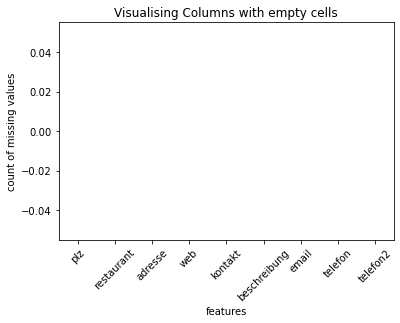

plz             0
restaurant      0
adresse         0
web             0
kontakt         0
beschreibung    0
email           0
telefon         0
telefon2        0
dtype: int64


In [69]:
# Visualising empty entries

df_tidy_contact.eq('').sum().plot(kind='bar',
                          xlabel = 'features',
                          ylabel = 'count of missing values',
                          title='Visualising Columns with empty cells',
                          rot=45,
                          color='orange')
plt.show()
print(df_tidy_contact.eq('').sum())
##plt.savefig('Visualisation Columns with empty cells.pdf')

In [75]:
# Saving to csv with actual date
date = datetime.now().strftime('%Y%m%d')

df_tidy_contact.to_csv(f"{date}_clean_zoeliakie.csv")